In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

In [25]:
data = pd.read_csv('ExpData.dat', delimiter='\s+')

In [26]:
data

,x,y,xdelta,ydelta
0,1.000,0.00073,0.02,0.00004
1,1.125,0.00080,0.02,0.00004
2,1.250,0.00082,0.02,0.00004
3,1.375,0.00091,0.02,0.00003
4,1.500,0.00105,0.02,0.00003
5,1.625,0.00109,0.02,0.00003
6,1.750,0.00115,0.02,0.00003
7,1.875,0.00132,0.02,0.00003
8,2.000,0.00135,0.02,0.00002
9,2.125,0.00146,0.02,0.00002


In [27]:
"""
Завантаження даних в змінні
"""
x = data.x
y = data.y
dx = data.xdelta
dy = data.ydelta



In [28]:
# Задаємо модельну функцію
def model_func(beta, x):
    """
    Визначення математичної моделі для підгони.

    Параметр підгонки beta[0] та beta[1]
    """
    y = beta[0] * x + beta[1]
    return y

In [29]:

# Здійснюємо підгону даних за моделлю
# https://docs.scipy.org/doc/scipy/reference/odr.html

# Створюємо екземпляр моделі
model = Model(model_func)

# Створюємо екземпляр даних data
data = RealData(x, y, dx, dy)

# Створюємо ODR зі своїми даними, моделлю та початковою оцінкою параметрів
odr = ODR(data, model, [6e-4, 0])

# Вибір методу підгонки
odr.set_job(fit_type=0)

# Отримуємо результати підгонки
output = odr.run()

In [33]:
slope, intercept = output.beta

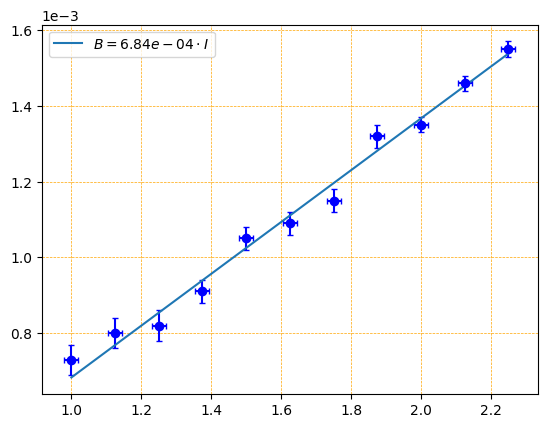

In [38]:
from matplotlib.ticker import ScalarFormatter
plt.errorbar(data.x, data.y, xerr=dx, yerr=dy, fmt='o', color='blue', capsize=2)
plt.plot(data.x, intercept + slope * data.x, label=rf'$B = {slope:.2e} \cdot I$')
plt.grid(which='both', color='orange', linestyle='--', linewidth=0.5) 
format_as_power = lambda x: f"$10^{{{int(np.log10(abs(x)))}}$"

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


plt.legend()
plt.show()

In [ ]:
results = [
        ("a", output.beta[0]),
        ("Da", output.sd_beta[0]),
        ("b", output.beta[1]),
        ("Db", output.sd_beta[1]),
        ("chi2", output.res_var),
    ]

for name, parameter in results:
    print(f'{name} = {parameter:.2e}')

a = 6.84e-04
Da = 2.36e-05
b = -8.63e-07
Db = 4.29e-05
chi2 = 9.27e-01
